In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
dataset=pd.read_csv('appdata10.csv')

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
from dateutil import parser

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [7]:
dataset['hour']=dataset.hour.str.slice(1,3).astype(int)

In [8]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [9]:
dataset2=dataset.copy().drop(columns=['user','first_open','screen_list','enrolled_date'])

In [10]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   dayofweek             50000 non-null  int64
 1   hour                  50000 non-null  int32
 2   age                   50000 non-null  int64
 3   numscreens            50000 non-null  int64
 4   minigame              50000 non-null  int64
 5   used_premium_feature  50000 non-null  int64
 6   enrolled              50000 non-null  int64
 7   liked                 50000 non-null  int64
dtypes: int32(1), int64(7)
memory usage: 2.9 MB


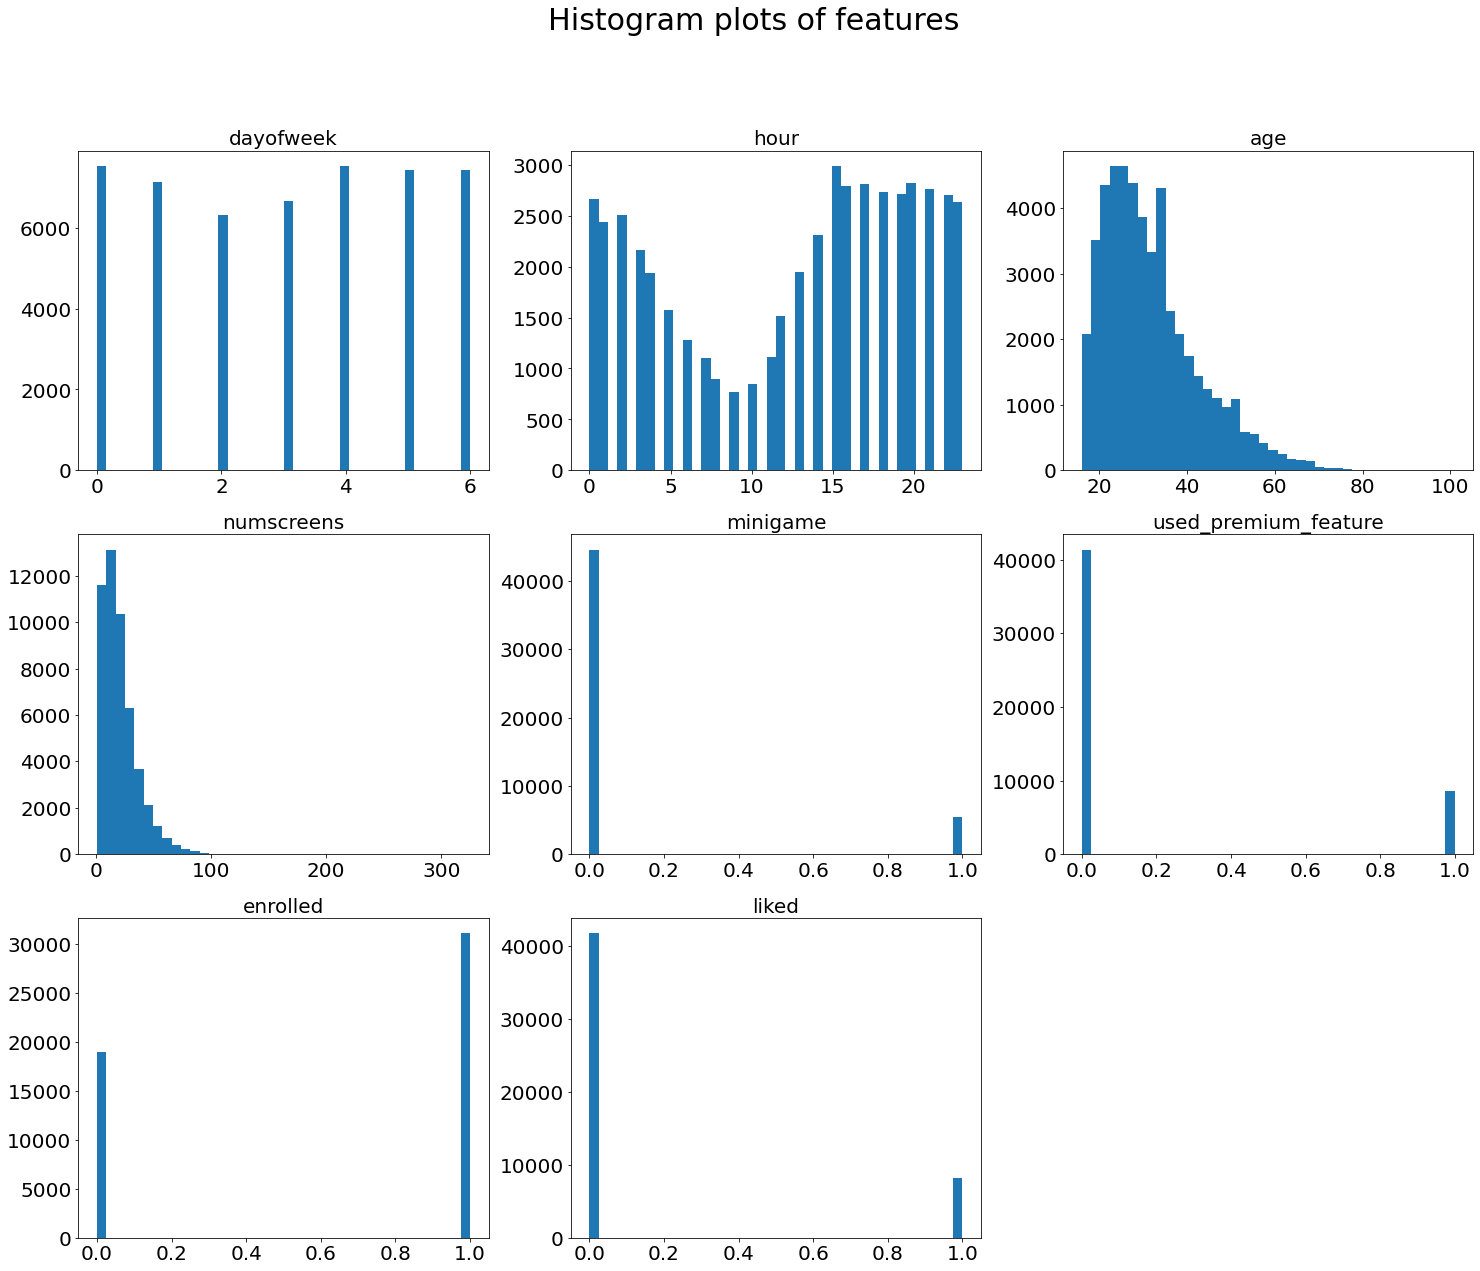

In [11]:
plt.figure(figsize=(25,20))
plt.rc('font',size=20)
plt.suptitle("Histogram plots of features",fontsize=30)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    plt.hist(dataset2.iloc[:,i-1],bins=40)
    plt.title(dataset2.columns[i-1],fontsize=20)
    plt.tight_layout
    

<Axes: >

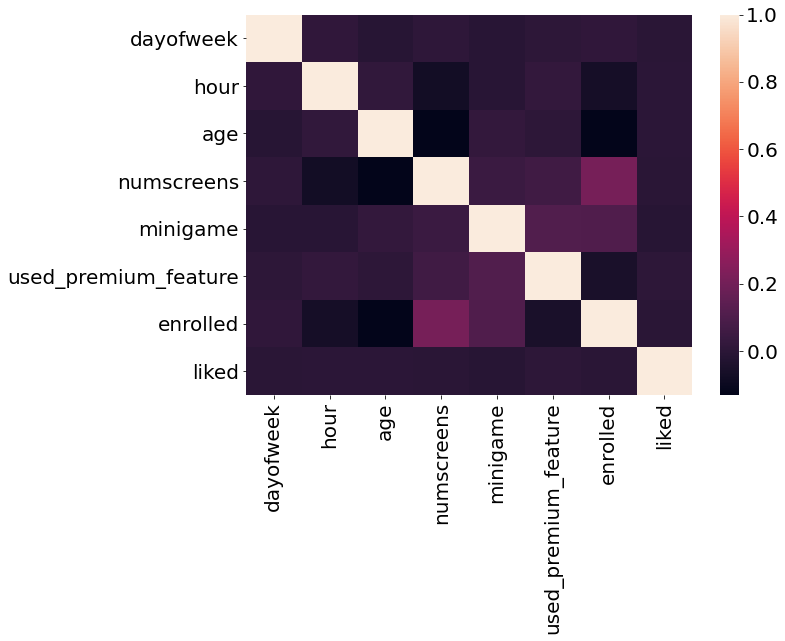

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset2.corr(),annot=False)

In [13]:
dataset2.isnull()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False


<Axes: >

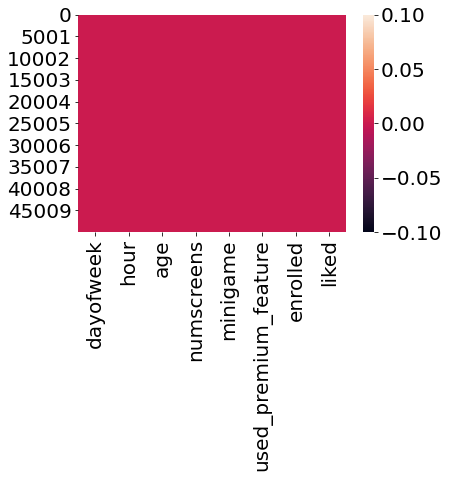

In [14]:
sns.heatmap(dataset2.isnull())

In [15]:

dataset2.corrwith(dataset2['enrolled']).iplot('bar',theme='ggplot')

In [16]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [17]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [18]:
dataset['first_open']=[parser.parse(row_data) for row_data in dataset['first_open']]

In [19]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [20]:
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date,str) else row_date for row_date in dataset['enrolled_date']]

In [21]:
dataset['difference']=dataset["enrolled_date"]-dataset["first_open"]

In [22]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaT
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaT
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0 days 00:03:03.159000
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0 days 00:05:49.180000


In [23]:
dataset['difference']=dataset.difference.astype('timedelta64[h]')

In [24]:
dataset.head(20)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
5,56480,2013-04-03 09:58:15.752,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0,0.0
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaT,0,NaN
7,249366,2012-12-11 03:07:49.875,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaT,0,NaN
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0,920.0
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0,0.0


(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

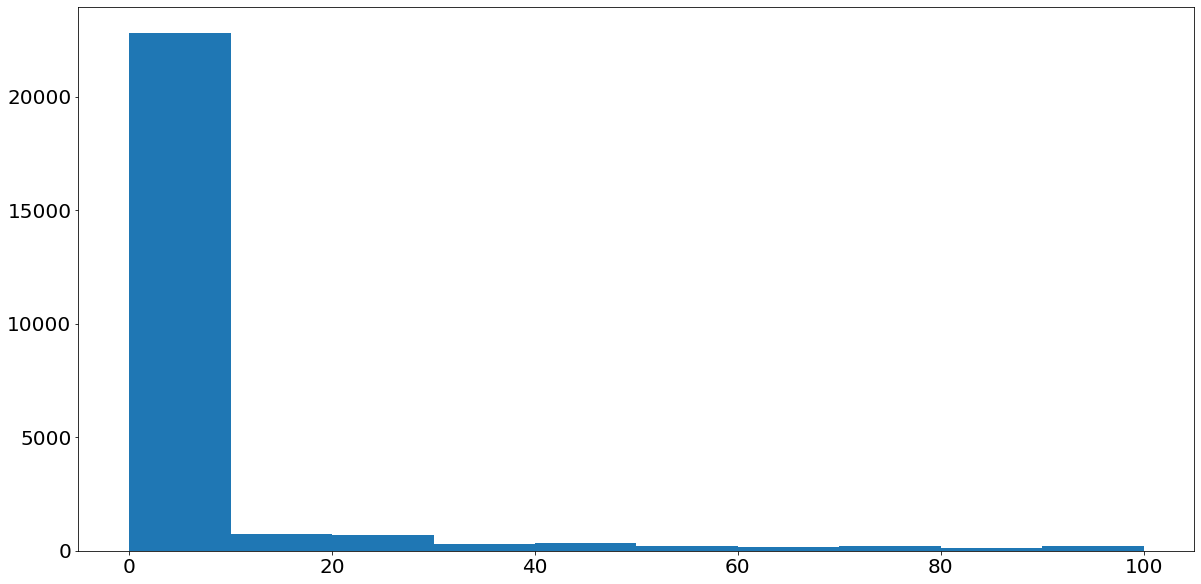

In [25]:
plt.figure(figsize=(20,10))
plt.hist(dataset['difference'].dropna(),range=(0,100))

<Axes: xlabel='difference', ylabel='Count'>

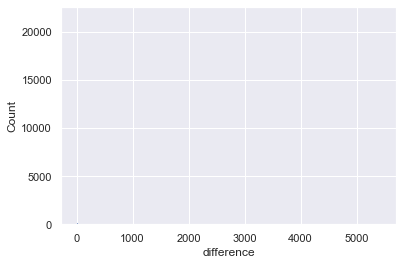

In [26]:
sns.set_theme()

sns.histplot(dataset.dropna(),x='difference')

In [27]:
dataset[dataset['difference']>48]['enrolled']=0

In [28]:
dataset.drop(columns=['first_open','enrolled_date','difference',])

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [29]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


# Let's do Feature Engineering now

In [30]:
top_screens=pd.read_csv('top_screens.csv').top_screens.values

In [31]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [32]:
dataset['screen_list']=dataset.screen_list+','
for sc in top_screens:
    dataset[sc]=dataset.screen_list.str.contains(sc)
    dataset['screen_list']=dataset.screen_list.str.replace(sc+",","")

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user                     50000 non-null  int64         
 1   first_open               50000 non-null  datetime64[ns]
 2   dayofweek                50000 non-null  int64         
 3   hour                     50000 non-null  int32         
 4   age                      50000 non-null  int64         
 5   screen_list              50000 non-null  object        
 6   numscreens               50000 non-null  int64         
 7   minigame                 50000 non-null  int64         
 8   used_premium_feature     50000 non-null  int64         
 9   enrolled                 50000 non-null  int64         
 10  enrolled_date            31074 non-null  datetime64[ns]
 11  liked                    50000 non-null  int64         
 12  difference               31074 n

In [34]:
dataset['Others']=dataset['screen_list'].str.count(',')

In [35]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Others
0,235136,2012-12-27 02:14:51.273,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,...,True,False,False,False,False,False,False,False,False,7
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,False,False,False,False,False,False,False,False,False,5
2,254414,2013-03-19 19:19:09.157,1,19,23,,3,0,1,0,...,False,False,False,False,False,False,False,False,False,0
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,...,False,False,False,False,False,False,False,False,False,6
4,51549,2013-02-26 18:50:48.661,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,...,False,False,False,False,False,False,False,False,False,10


In [36]:
dataset.drop(columns=['screen_list'],inplace=True)

In [37]:
for sc in top_screens:
    dataset[sc]=dataset[sc]+0

In [38]:
dataset.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Others
0,235136,2012-12-27 02:14:51.273,3,2,23,15,0,0,0,NaT,...,1,0,0,0,0,0,0,0,0,7
1,333588,2012-12-02 01:16:00.905,6,1,24,13,0,0,0,NaT,...,0,0,0,0,0,0,0,0,0,5
2,254414,2013-03-19 19:19:09.157,1,19,23,3,0,1,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,0,6
4,51549,2013-02-26 18:50:48.661,1,18,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,0,10


In [39]:
dataset.drop(columns=['first_open','enrolled_date','difference'],inplace=True)

In [40]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Others
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [41]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

# Funneling

In [42]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]

In [46]:
for sc_name,sc in zip(["Savingscount","CMcount","CCcount","Loanscount"],[savings_screens,cm_screens,cc_screens,loan_screens]):
    dataset[sc_name]=dataset[sc].sum(axis=1)
    dataset.drop(columns=sc,inplace=True)
    

In [47]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Others',
       'Savingscount', 'CMcount', 'CCcount', 'Loanscount'],
      dtype='object')

In [48]:
dataset.head()


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Others,Savingscount,CMcount,CCcount,Loanscount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [49]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Others',
       'Savingscount', 'CMcount', 'CCcount', 'Loanscount'],
      dtype='object')

In [51]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Others,Savingscount,CMcount,CCcount,Loanscount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [52]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Others',
       'Savingscount', 'CMcount', 'CCcount', 'Loanscount'],
      dtype='object')

In [56]:
dataset.to_csv('newapp_data823.csv',doublequote=False)

In [2]:
new_dataset=pd.read_csv('newapp_data823.csv',index_col=0)

In [3]:
new_dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Others,Savingscount,CMcount,CCcount,Loanscount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [4]:
X=new_dataset.drop(['enrolled'],axis=1)

In [5]:
Y=new_dataset['enrolled']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [7]:
train_userid=X_train['user']


In [8]:
len(train_userid.values)

35000

In [9]:
X_train.drop(['user'],axis=1,inplace=True)

In [10]:
test_userid=X_test.user
X_test.drop(['user'],axis=1,inplace=True)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()

In [13]:
X_train2=pd.DataFrame(sc.fit_transform(X_train)) #sc return a numpy array

In [14]:
X_test2=pd.DataFrame(sc.transform(X_test))

C:\Users\Abhishek Ambast\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



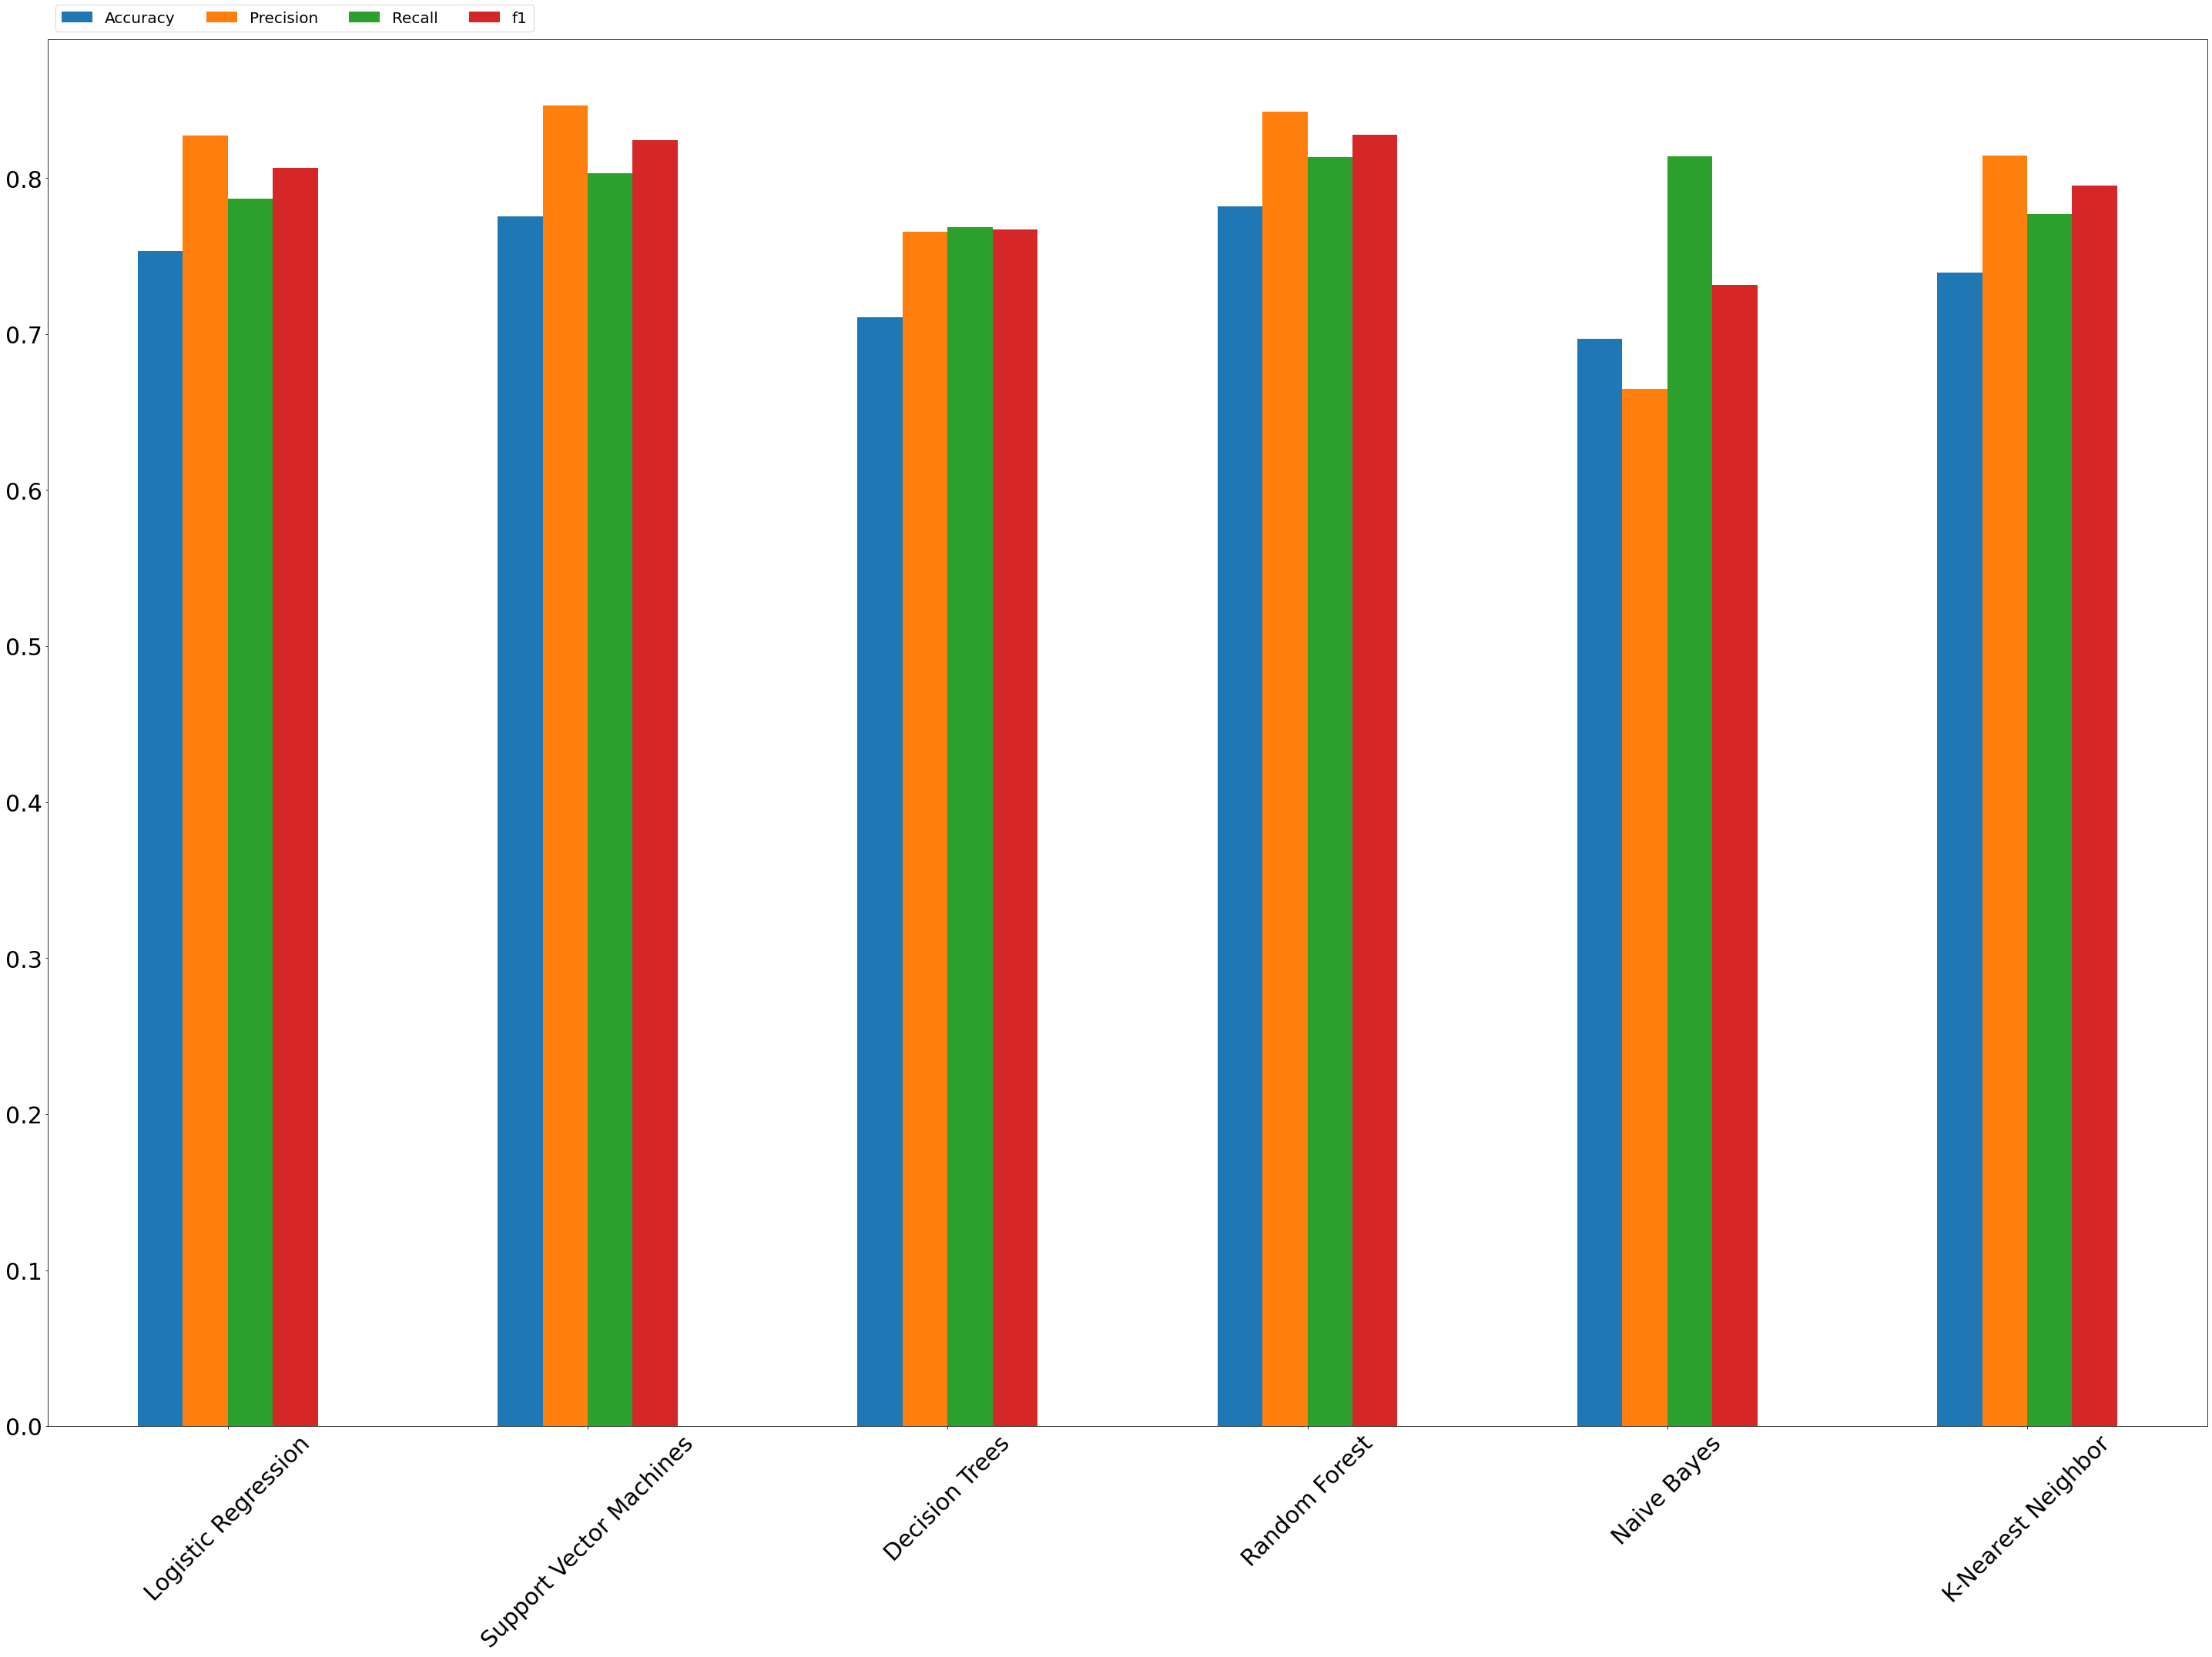

In [18]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()


# Support Vector Machines
from sklearn.svm import SVC
models['Support Vector Machines'] = SVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall,f1 = {}, {}, {},{}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train2, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test2)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key]=f1_score(predictions,y_test)

    
    



df_check=pd.DataFrame(index=models.keys(),columns=["Accuracy","Precision","Recall","f1"])
df_check["Accuracy"]=accuracy.values()
df_check["Precision"]=precision.values()
df_check["Recall"]=recall.values()
df_check["f1"]=f1.values()


ax  = df_check.plot.bar(rot=45,figsize=(40,30),fontsize=30)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 20})
plt.tight_layout()

In [19]:
param_grid = { 'bootstrap': [True], 'max_depth': [1,3,5, 10,12,15,None], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [5,6,7,8,9,10,11, 12, 13,15,20,40,60,80,100]}

In [37]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(n_estimators=100)
g_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 2, return_train_score=True)
g_search.fit(X_train2,y_train)

Fitting 3 folds for each of 315 candidates, totalling 945 fits
[CV] END bootstrap=True, max_depth=1, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, n_estimators=7; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, n_estimators=7; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, n_estimators=7; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=auto, n_estimators=8; total time=   0.0s
[CV] END bootstra

[CV] END bootstrap=True, max_depth=1, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=1, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, n_estimators=7; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, n_estimators=7; total time=   0.0s
[CV] END bootstrap=True, max_depth=1, max_features=sqrt, n_estimators=7; tot

[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=log2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, n_estimators=7; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=log2, n_estimators=7; t

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=80; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=7; 

[CV] END bootstrap=True, max_depth=5, max_features=log2, n_estimators=80; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, max_features=log2, n_estimators=80; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, max_features=log2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, max_features=log2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=log2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, n_estimators=6; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, n_estimators=6;

[CV] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=60; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=80; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=80; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=80; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=60; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=60; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=60; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=80; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=80; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=80; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=12, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=12, max_features=auto, 

[CV] END bootstrap=True, max_depth=12, max_features=log2, n_estimators=40; total time=   0.5s
[CV] END bootstrap=True, max_depth=12, max_features=log2, n_estimators=40; total time=   0.5s
[CV] END bootstrap=True, max_depth=12, max_features=log2, n_estimators=60; total time=   0.8s
[CV] END bootstrap=True, max_depth=12, max_features=log2, n_estimators=60; total time=   0.9s
[CV] END bootstrap=True, max_depth=12, max_features=log2, n_estimators=60; total time=   1.0s
[CV] END bootstrap=True, max_depth=12, max_features=log2, n_estimators=80; total time=   1.3s
[CV] END bootstrap=True, max_depth=12, max_features=log2, n_estimators=80; total time=   1.1s
[CV] END bootstrap=True, max_depth=12, max_features=log2, n_estimators=80; total time=   1.1s
[CV] END bootstrap=True, max_depth=12, max_features=log2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=12, max_features=log2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=12, max_features=log2, 

[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=20; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=40; total time=   0.7s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=40; total time=   0.9s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=40; total time=   0.9s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=60; total time=   1.1s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=60; total time=   1.1s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=60; total time=   1.1s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=80; total time=   1.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=80; total time=   1.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=80; total time=   1.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_

[CV] END bootstrap=True, max_depth=15, max_features=sqrt, n_estimators=20; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, n_estimators=20; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, n_estimators=40; total time=   0.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, n_estimators=40; total time=   0.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, n_estimators=40; total time=   0.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, n_estimators=60; total time=   1.1s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, n_estimators=60; total time=   1.1s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, n_estimators=60; total time=   1.1s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, n_estimators=80; total time=   1.5s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, n_

[CV] END bootstrap=True, max_depth=None, max_features=log2, n_estimators=13; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, n_estimators=15; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, n_estimators=15; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, n_estimators=15; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, n_estimators=40; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=log2, n_estimators=40; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, n_estimators=40; total time=   1.1s
[CV] END bootstrap=True, max_depth=None,

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True],
                         'max_depth': [1, 3, 5, 10, 12, 15, None],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 20,
                                          40, 60, 80, 100]},
             return_train_score=True, verbose=2)

In [38]:
g_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 80}

In [39]:
rf1=RandomForestClassifier(max_depth=15,n_estimators=80)

In [40]:
rf1.fit(X_train2, y_train)

RandomForestClassifier(max_depth=15, n_estimators=80)

In [41]:
Y_check=rf1.predict(X_test2)

In [43]:
print(f'accuracy of our new model is {accuracy_score(y_test,Y_check)}')

accuracy of our new model is 0.7842666666666667


In [30]:
from sklearn.linear_model import LogisticRegression


In [35]:
lr=LogisticRegression(random_state=0,penalty='l2')

In [36]:
lr.fit(X_train2,y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred=lr.predict(X_test2)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print("Here is the classifiacte report: \n"+"\n"+classification_report(y_test,y_pred))

Here is the classifiacte report: 

              precision    recall  f1-score   support

           0       0.69      0.63      0.66      5669
           1       0.79      0.83      0.81      9331

    accuracy                           0.75     15000
   macro avg       0.74      0.73      0.73     15000
weighted avg       0.75      0.75      0.75     15000



In [55]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [44]:
print(precision_score(y_test,y_pred))

0.7868935996738687


In [45]:
print(recall_score(y_test,y_pred))

0.827456864216054


In [46]:
print(f1_score(y_test,y_pred))

0.806665621898344


In [52]:
cm=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=[0,1],index=[0,1])

<Axes: >

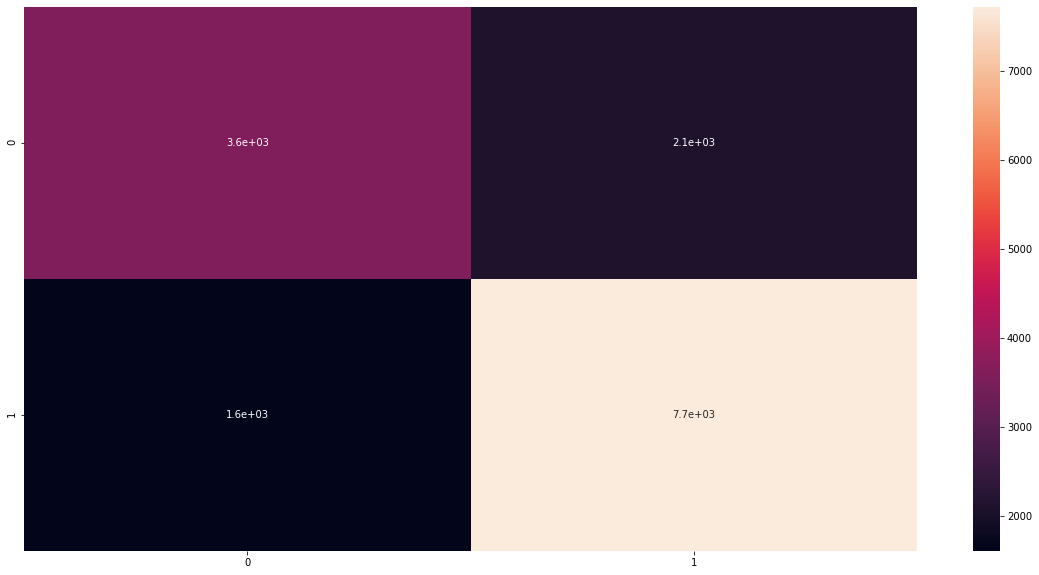

In [53]:

plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True)

In [59]:
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.7533


In [61]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_score=cross_val_score(lr,X_train2,y_train)

In [62]:
cross_score=cross_val_score(lr,X_train2,y_train,cv=10)

In [63]:
print(cross_score)

[0.75542857 0.75628571 0.76371429 0.76228571 0.75314286 0.76028571
 0.74828571 0.76314286 0.75571429 0.75114286]


In [68]:
print(f'Mean accuracy after using Kfold: {cross_score.mean()} +/- {2*cross_score.std()}')

Mean accuracy after using Kfold: 0.756942857142857 +/- 0.010025437035616017


In [82]:
result=pd.DataFrame(np.transpose([y_test,y_pred]),columns=['enrolled','prediction'])

In [83]:
result.head()

,enrolled,prediction
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [109]:
result=pd.concat([pd.DataFrame(test_userid.values.astype(int),columns=['user']),result],axis=1)

In [110]:
result.head()

,user,enrolled,prediction
0,239786.0,1.0,1.0
1,279644.0,1.0,1.0
2,98290.0,0.0,0.0
3,170150.0,1.0,1.0
4,237568.0,1.0,1.0


In [113]:
result=result.convert_dtypes()

In [114]:
result.head()

,user,enrolled,prediction
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1


In [124]:
df_coeff=pd.concat([pd.DataFrame(X.columns[1:],columns=["Features"]),pd.DataFrame(np.transpose(lr.coef_),columns=["Coefficient"])],axis=1)

,Features,Coefficient
0,dayofweek,0.032494
1,hour,-0.049153
2,age,-0.085671
3,numscreens,-0.111608
4,minigame,0.284847
5,used_premium_feature,-0.078320
6,liked,-0.000265
7,location,-0.168459
8,Institutions,0.023233
9,VerifyPhone,0.578707


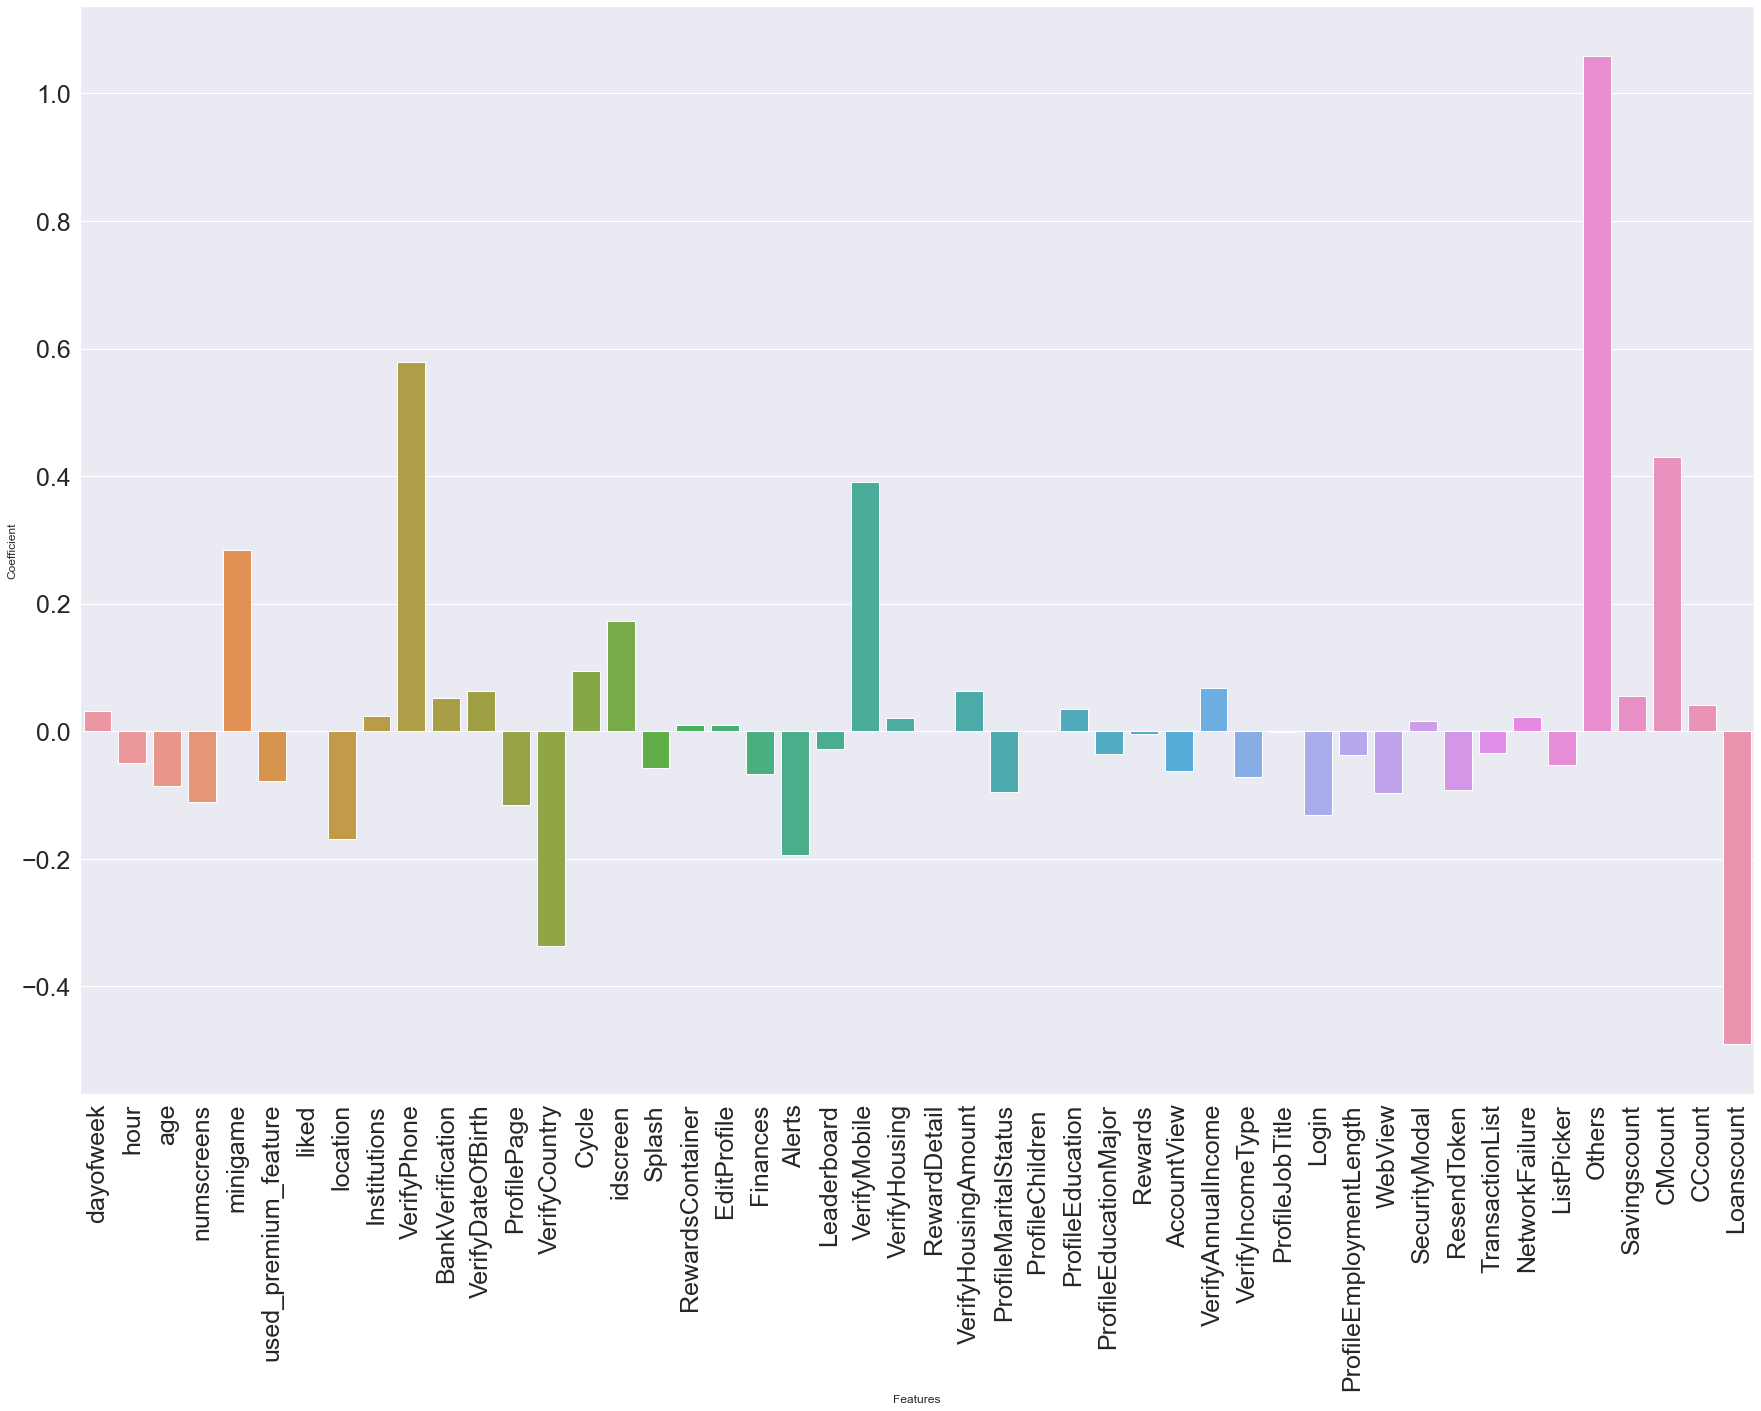

In [137]:
sns.set_theme()
plt.figure(figsize=(30,20))
sns.barplot(x=df_coeff['Features'],y=df_coeff['Coefficient'],data=df_coeff)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=25)
plt.show()


# Let's Tune the model

In [138]:
from sklearn.model_selection import GridSearchCV


In [141]:
reg=["l1","l2"]
c=[0.001,0.01,0.1,1,10,100]
param=dict(penalty=reg,C=c)


In [148]:
GSCV=GridSearchCV(LogisticRegression(solver='liblinear'),param_grid=param,cv=10,n_jobs=-1,verbose=2)

In [149]:
import time

In [150]:
t0=time.time()
GSCV.fit(X_train2,y_train)
t1 = time.time()

print("Took %0.2f seconds"%(t1-t0))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Took 20.80 seconds


In [151]:
rf_best_accuracy = GSCV.best_score_
rf_best_parameters = GSCV.best_params_
rf_best_accuracy, rf_best_parameters


(0.7571142857142857, {'C': 0.1, 'penalty': 'l1'})

In [157]:
reg=["l1","l2"]
c=[0.5,0.2,0.1,1,0.05,0.08]
param=dict(penalty=reg,C=c)
GSCV1=GridSearchCV(LogisticRegression(solver='liblinear'),param_grid=param,cv=10,n_jobs=-1,verbose=2)



In [158]:
GSCV1.fit(X_train2,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.5, 0.2, 0.1, 1, 0.05, 0.08],
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [159]:
rf_best_accuracy = GSCV1.best_score_
rf_best_parameters = GSCV1.best_params_
rf_best_accuracy, rf_best_parameters


(0.7571428571428572, {'C': 0.1, 'penalty': 'l1'})

In [163]:
reg=["l1","l2"]
c = [0.1, 0.5, 0.9, 1, 2, 5]
param=dict(penalty=reg,C=c)
GSCV2=GridSearchCV(LogisticRegression(solver='liblinear'),param_grid=param,cv=10,n_jobs=-1,verbose=2,scoring='accuracy')

In [164]:
GSCV2.fit(X_train2,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [165]:
rf_best_accuracy = GSCV2.best_score_
rf_best_parameters = GSCV2.best_params_
rf_best_accuracy, rf_best_parameters

(0.7571142857142857, {'C': 0.1, 'penalty': 'l1'})

In [166]:
y_pred=GSCV2.predict(X_test2)

In [195]:
y_test=y_test.reset_index(drop=True)


In [184]:
final_result=pd.DataFrame(np.transpose(np.array([y_test,y_pred])),columns=['Enrolled','Predicted']).dropna()

In [185]:
final_result=pd.concat([pd.DataFrame(test_userid.values,columns=["User"]),final_result],axis=1)

In [196]:
final_result=final_result.reset_index(drop=True)
final_result.head(20)

,User,Enrolled,Predicted
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


In [188]:
check=final_result[final_result["Enrolled"]==final_result["Predicted"]].User

In [190]:
check.shape

(11296,)

In [191]:
final_result.shape

(15000, 3)

In [192]:
accuracy=check.shape[0]/final_result.shape[0]

In [194]:
print("Manualy calculate accuracy: %0.4f"%accuracy)

Manualy calculate accuracy: 0.7531


# This is the end of the notebook